In [ ]:
# Mount Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Change directory to where the CNN code is located
%cd /content/gdrive/My Drive/CNN
!ls

/content/gdrive/My Drive/CNN
 1-conv-128-nodes-0-dense-1681324451-model-0.6954314708709717-accuracy.h5
 1-conv-128-nodes-0-dense-1681351857-model-0.7284263968467712-accuracy.h5
 1-conv-128-nodes-1-dense-1681337863-model-0.4517766535282135-accuracy.h5
 1-conv-32-nodes-0-dense-1681319480-model-0.7081218361854553-accuracy.h5
 1-conv-32-nodes-0-dense-1681346471-model-0.692893385887146-accuracy.h5
 1-conv-32-nodes-1-dense-1681332123-model-0.25380709767341614-accuracy.h5
 1-conv-32-nodes-1-dense-1681360383-model-0.1878172606229782-accuracy.h5
 1-conv-64-nodes-0-dense-1681321216-model-0.703045666217804-accuracy.h5
 1-conv-64-nodes-0-dense-1681348356-model-0.710659921169281-accuracy.h5
 1-conv-64-nodes-1-dense-1681333654-model-0.39593908190727234-accuracy.h5
 1-conv-64-nodes-1-dense-1681362187-model-0.1928934007883072-accuracy.h5
 2-conv-128-nodes-0-dense-1681325573-model-0.7055837512016296-accuracy.h5
 2-conv-128-nodes-0-dense-1681353036-model-0.7131979465484619-accuracy.h5
 2-conv-128-nodes-

In [ ]:
%tensorflow_version 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import pickle
import numpy as np
import tensorflow as tf
# Load the testing data from a pickle file
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)
# Load the training data from a pickle file
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)
# Load the testing labels from a pickle file
pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)
# Load the training labels from a pickle file
pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)
# Set the desired image size for resizing
IMG_SIZE = (224, 224)
# Resize the training images using TensorFlow's image module
X_train = tf.image.resize(X_train, IMG_SIZE)

# Resize the validation images using TensorFlow's image module
X_test = tf.image.resize(X_test, IMG_SIZE)

# Convert the training labels to a numpy array
Y_train = np.array(Y_train)
# Convert the testing labels to a numpy array
Y_test = np.array(Y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import vgg16
import keras.layers as layers
from keras.layers import Conv2D
import numpy as np

In [ ]:
## Import TensorBoard and EarlyStopping
tensorboard = TensorBoard(log_dir='./VGG16logs', histogram_freq=0,
                          write_graph=True, write_images=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


In [ ]:
#creates a pre-trained VGG16 model instance using the Keras library.
vgg16_model = vgg16.VGG16()
# prints a summary of the architecture of the VGG16 model to the console, including the number of parameters in each layer.
vgg16_model.summary()
#returns the type of the object vgg16_model, which is a Keras model instance of the VGG16 architecture.
type(vgg16_model)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

keras.engine.functional.Functional

In [ ]:
model1 = Sequential()

#for layer in vgg16_model.layers:
for layer in vgg16_model.layers[:-1]: #model1.layers.pop() not working, so -1
    model1.add(layer) # convert to sequantial model
    
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
#The code sets all layers in model1 to be untrainable by iterating over each layer and setting its trainable attribute to False. 
#Then it adds a new dense layer with 4 output units and a softmax activation function to the end of the model1. Finally, it prints a summary of the updated model1 which now includes the new dense layer.
for layer in model1.layers:
    layer.trainable = False
    
model1.add(Dense(4,activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
# model1.compile
model1.compile(loss='sparse_categorical_crossentropy',optimizer= "adam", metrics=['accuracy'],)

In [ ]:
#Fit the model

history = model1.fit(X_train, Y_train,
            batch_size=32,
            epochs=20,
            validation_data=(X_test,Y_test),
            callbacks=[es,tensorboard])

Epoch 1/20
90/90 [==============================] - 25s 203ms/step - loss: 0.7186 - accuracy: 0.7425 - val_loss: 1.5998 - val_accuracy: 0.5888
Epoch 2/20
90/90 [==============================] - 14s 152ms/step - loss: 0.3984 - accuracy: 0.8460 - val_loss: 1.4477 - val_accuracy: 0.6269
Epoch 3/20
90/90 [==============================] - 15s 165ms/step - loss: 0.2943 - accuracy: 0.8909 - val_loss: 1.7341 - val_accuracy: 0.6624
Epoch 4/20
90/90 [==============================] - 14s 156ms/step - loss: 0.2655 - accuracy: 0.9000 - val_loss: 1.6069 - val_accuracy: 0.7030
Epoch 5/20
90/90 [==============================] - 14s 153ms/step - loss: 0.2193 - accuracy: 0.9202 - val_loss: 1.6255 - val_accuracy: 0.7335
Epoch 6/20
90/90 [==============================] - 15s 162ms/step - loss: 0.1686 - accuracy: 0.9429 - val_loss: 1.6439 - val_accuracy: 0.7310
Epoch 7/20
90/90 [==============================] - 14s 151ms/step - loss: 0.1409 - accuracy: 0.9592 - val_loss: 1.8006 - val_accuracy: 0.7310

In [ ]:
fit_model = model1.fit(X_test,Y_test,
            batch_size=32,
            epochs=20)

Epoch 1/20
13/13 [==============================] - 2s 128ms/step - loss: 1.1616 - accuracy: 0.6929
Epoch 2/20
13/13 [==============================] - 2s 127ms/step - loss: 0.4622 - accuracy: 0.8325
Epoch 3/20
13/13 [==============================] - 2s 129ms/step - loss: 0.2399 - accuracy: 0.9162
Epoch 4/20
13/13 [==============================] - 2s 133ms/step - loss: 0.2359 - accuracy: 0.9213
Epoch 5/20
13/13 [==============================] - 2s 132ms/step - loss: 0.2077 - accuracy: 0.9213
Epoch 6/20
13/13 [==============================] - 2s 128ms/step - loss: 0.2160 - accuracy: 0.9213
Epoch 7/20
13/13 [==============================] - 2s 127ms/step - loss: 0.1331 - accuracy: 0.9645
Epoch 8/20
13/13 [==============================] - 2s 127ms/step - loss: 0.0859 - accuracy: 0.9772
Epoch 9/20
13/13 [==============================] - 2s 127ms/step - loss: 0.0625 - accuracy: 0.9873
Epoch 10/20
13/13 [==============================] - 2s 127ms/step - loss: 0.0592 - accuracy: 0.9924

In [ ]:
#Score 
scores = model1.evaluate(X_test, Y_test, verbose=1) 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

13/13 [==============================] - 2s 132ms/step - loss: 0.0362 - accuracy: 0.9924
Test loss: 0.03618243336677551
Test accuracy: 0.9923858046531677


In [ ]:
model1.save("VGG16.h5")

In [ ]:
 #precision    recall  f1-score   support
y_pred = model1.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred_bool))

7/7 [==============================] - 9s 218ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.99      0.98      0.99       115
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00        74

    accuracy                           0.99       394
   macro avg       0.99      0.99      0.99       394
weighted avg       0.99      0.99      0.99       394



In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

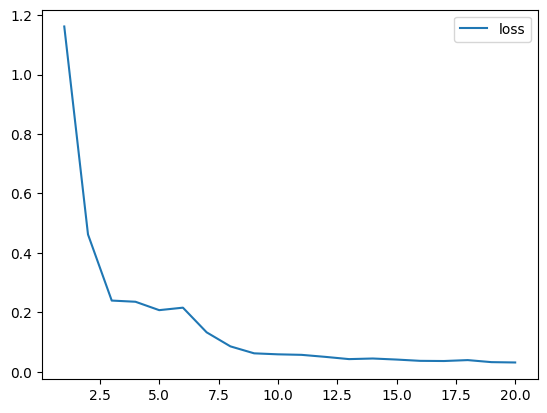

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
plt.show()

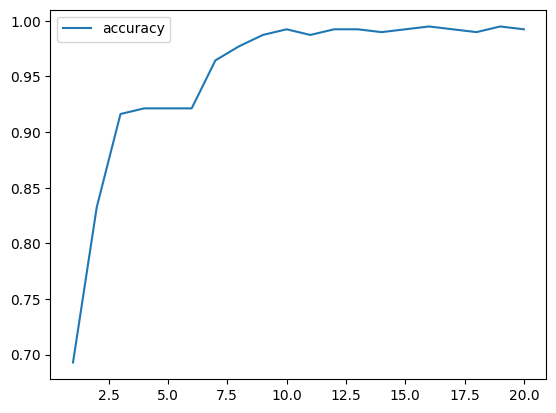

In [ ]:
#  Plot the accuracy
history_df.plot(y="accuracy")
plt.show()